# Before we Begin: Mathematical Building Blocks of Neural Networks
- Understanding DL requires familiarity with simple mathematical concepts:
  - Tensor
  - Tensor Operations
  - Differentiation
  - Gradient Descent
  - and more
- We will begin with a practical example of NN.

## A first look at Neural Network
- A NN that classifies handwritten digits
- Problem:
  - Classify grayscale images of handwrittem digits (28x28 pixels) into their 10 categories (0 through 9)
  - Dataset used: MNIST
    - 60,000 training examples and
    - 10,000 testing examples

- Loading the MNIST dataset. It comes preloaded in Keras in form of 4 numpy arrays.

In [13]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the training set and, `test_images` and `test_labels` form testing set. Model will learn from training set and its performance will be measured using testing set.

Some examples from training images:

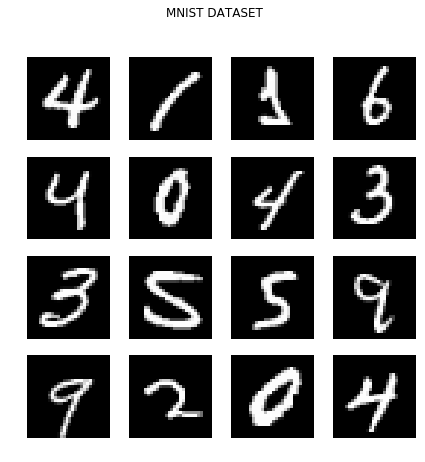

In [14]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.permutation(train_images.shape[0])[:16]
images = train_images[indices]
plt.figure(figsize=(7, 7))
plt.suptitle('MNIST DATASET')
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.axis('off')
plt.show()

The images are numpy arrays and the labels are an array of digits with range => \[0, 9\]. Images and labels have one-to-one correspondence. Let's look at the shape of all these arrays.

In [3]:
print('Train Images Shape:', train_images.shape)
print('Train Labels Shape:', train_labels.shape)
print('Test Images Shape:', test_images.shape)
print('Test Labels Shape:', test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's start building the neural network.

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Without going too much into details:
  - Building Block of NN is a *layer*.
  - It can be considered as a data filter - some data goes in and comes out in a more useful form.
  - layers extract *representation* out of data, hopefully which are more useful for the given problem.
  - Most deep learning is chaining these layers to implement a form of progressive *data distillation*.
  - Here the model is a *sequence* of 2 layers.
  - Last layer is a 10-way softmax, i.e., it will return an array of 10 probabilities summing to 1. Each score will be probability of input being the digit at the index of the score.
  
  
Making the network ready for training, we need to add 3 more things:
  - *loss function*: to measure performance on training set and steer itself in right direction.
  - *optimizer*: The mechanism to steer in the right direction, by updating weights from feedback by *loss function*.
  - *metrics* or *monitoring during training and testing* - Here we will only care about accuracy (fraction of images correctly classified).

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Preprocessing the data:
  - Reshape the data into the shape network expects: (60000, 28, 28) => (60000, 28\*28)
  - Scaling the data so each value is in \[0, 1\]: values currently in \[0, 255\]. Before scaling we convert values from current dtype of `uint8` to `float32`.

In [8]:
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255.

Categorical encoding of data (Step explained in chapter 3):

In [9]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Time to train the model on the training data. This is done via `fit` method of the model.

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 22s 371us/step - loss: 0.2549 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1034 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0681 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0492 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0368 - acc: 0.9892


2 quantities are displayed during training:
  - loss of network over training data
  - accuracy of network over training data.

Final loss on training data: 0.0368 and final accuracy 98.9%

Model's performance on test set:

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 86us/step


In [12]:
print('test loss:', test_loss)
print('test acc:', test_acc)

test loss: 0.07229867882688995
test acc: 0.9772


Model's accuracy on test set is 97.7% which lower than the training set. This gap between the accuracy is *overfitting*: the fact model tends to perform worse on new data as compared to training data.

Now let's learn about the mathematical concepts.

## Data Representations for Neural Network